REGIONAL CONTRIBUTIONS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
papers = pd.read_csv("/content/4_updated_subset_with_affiliation.csv")
papers

,Journal,Title,Tag1,Tag2,Tag3,Tag4,Tag5,Compound,Authors,Year,Abstract,Paper_type,Affiliations
0,Molecules : A Journal of Synthetic Chemistry a...,Anti-Trypanosomatid Elemanolide Sesquiterpene ...,1A,2AA,NaN,NaN,Plant extract,Sesquiterpene Lactones,"Kimani, Njogu M.; Matasyoh, Josphat C.; Kaiser...",2017,Sleeping sickness or human African trypanosomi...,['Journal Article'],['Institute of Pharmaceutical Biology and Phyt...
1,Viruses,Antiviral and Cytotoxic Activity of Different ...,1B,2BB,NaN,NaN,Plant extract,NaN,"Panda, Sujogya Kumar; Castro, Ana HortÃÂªncia...",2020,Chikungunya and yellow fever virus cause vecto...,['Journal Article'],"['Department of Biology, Katholieke Universite..."
2,Molecules,Antiprotozoal Activity of Plants Used in the M...,1A,2AA,NaN,NaN,Plant extract,"Gallic acid, methyl gallate, 2,3,4,6-tetragall...","Vahekeni, Nina; Brillatz, ThÃÂ©o; Rahmaty, Ma...",2024,"Folk medicine is widely used in Angola, even f...",['Journal Article'],['Department of Medical Parasitology and Infec...
3,Molecules,Search for Antiprotozoal Activity in Herbal Me...,1A,2AA,2AB,NaN,Plant extract,NaN,"Llurba Montesino, NÃÂºria; Kaiser, Marcel; Br...",2015,"Sleeping sickness, Chagas disease, Leishmanias...",['Journal Article'],['Institut fÃÂ¼r Pharmazeutische Biologie und...
4,Plants,Medicinal Plant Preparations Administered by B...,1A,2AC,NaN,NaN,Plant extract,NaN,"Dube, Mthandazo; Raphane, Boingotlo; Sethebe, ...",2022,Schistosomiasis and soil-transmitted helminths...,['Journal Article'],"['Department of Bioorganic Chemistry, Leibniz ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,Scientifica,Photomediated Larvicidal Activity of Pheophorb...,1A,2AC,NaN,NaN,Plant compounds,NaN,"Singh, Divya Jyoti; Singh, Vinay Kumar; Singh,...",2017,Fasciolosis is a parasitic disease caused by F...,['Journal Article'],"['Malacology Laboratory, Department of Zoology..."
561,PLoS Neglected Tropical Diseases,Bacillus thuringiensis-derived Cry5B Has Poten...,1A,2AC,NaN,NaN,Microbial-derived,Bacillus thuringiensis-derived Cry5B,"Urban, Joseph F.; Hu, Yan; Miller, Melanie M.;...",2013,Ascaris suum and Ascaris lumbricoides are two ...,['Journal Article'],"['USDA, Agricultural Research Service, Beltsvi..."
562,The Journal of Venomous Animals and Toxins Inc...,Synergic effects between ocellatin-F1 and bufo...,1B,2B_,NaN,NaN,Animal-derived,"Bufotenine, ocellatin-P1 and ocellatin-F1, are...","Cunha Neto, Rene dos Santos; Vigerelli, Hugo; ...",2015,Background: Rabies is an incurable neglected z...,['Journal Article'],"['Butantan Institute, Laboratory of Biochemist..."
563,Viruses,Silvestrol Inhibits Chikungunya Virus Replicat...,1B,2BB,NaN,NaN,Plant compounds,Silvestrol,"Henss, Lisa; Scholz, Tatjana; GrÃÂ¼nweller, A...",2018,"Silvestrol, a natural compound that is isolate...",['Journal Article'],"['Paul-Ehrlich-Institut, Department of Virolog..."


In [ ]:
print(papers.columns)

Index(['Journal', 'Title', 'Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5', 'Compound',
       'Authors', 'Year', 'Abstract', 'Paper_type', 'Affiliations'],
      dtype='object')


In [ ]:
def classify_labels(text):
    labels = []
    patterns = {
        "Africa": [
            r"(?i)Algeria", r"(?i)Angola", r"(?i)Benin", r"(?i)Botswana", r"(?i)Burkina Faso",
            r"(?i)Burundi", r"(?i)Cameroon", r"(?i)Cape Verde", r"(?i)Central African Republic",
            r"(?i)Chad", r"(?i)Comoros", r"(?i)Congo", r"(?i)Djibouti", r"(?i)Egypt",
            r"(?i)Equatorial Guinea", r"(?i)Eritrea", r"(?i)Eswatini", r"(?i)Ethiopia", r"(?i)Gabon",
            r"(?i)Gambia", r"(?i)Ghana", r"(?i)Guinea", r"(?i)Guinea-Bissau", r"(?i)Ivory Coast",
            r"(?i)Kenya", r"(?i)Lesotho", r"(?i)Liberia", r"(?i)Libya", r"(?i)Madagascar",
            r"(?i)Malawi", r"(?i)Mali", r"(?i)Mauritania", r"(?i)Mauritius", r"(?i)Morocco",
            r"(?i)Mozambique", r"(?i)Namibia", r"(?i)Niger", r"(?i)Nigeria", r"(?i)Rwanda",
            r"(?i)Sao Tome and Principe", r"(?i)Senegal", r"(?i)Seychelles", r"(?i)Sierra Leone",
            r"(?i)Somalia", r"(?i)South Africa", r"(?i)South Sudan", r"(?i)Sudan", r"(?i)Tanzania",
            r"(?i)Togo", r"(?i)Tunisia", r"(?i)Uganda", r"(?i)Zambia", r"(?i)Zimbabwe"
        ],
        "Asia": [
            r"(?i)Afghanistan", r"(?i)Armenia", r"(?i)Azerbaijan", r"(?i)Bahrain", r"(?i)Bangladesh",
            r"(?i)Bhutan", r"(?i)Brunei", r"(?i)Cambodia", r"(?i)China", r"(?i)Cyprus",
            r"(?i)Georgia", r"(?i)India", r"(?i)Indonesia", r"(?i)Iran", r"(?i)Iraq",
            r"(?i)Israel", r"(?i)Japan", r"(?i)Jordan", r"(?i)Kazakhstan", r"(?i)Kuwait",
            r"(?i)Kyrgyzstan", r"(?i)Laos", r"(?i)Lebanon", r"(?i)Malaysia", r"(?i)Maldives",
            r"(?i)Mongolia", r"(?i)Myanmar", r"(?i)Nepal", r"(?i)North Korea", r"(?i)Oman",
            r"(?i)Pakistan", r"(?i)Palestine", r"(?i)Philippines", r"(?i)Qatar", r"(?i)Saudi Arabia",
            r"(?i)Singapore", r"(?i)South Korea", r"(?i)Sri Lanka", r"(?i)Syria", r"(?i)Tajikistan",
            r"(?i)Thailand", r"(?i)Turkey", r"(?i)Turkmenistan", r"(?i)United Arab Emirates", r"(?i)UAE",
            r"(?i)Uzbekistan", r"(?i)Vietnam", r"(?i)Yemen"
        ],
        "Europe": [
            r"(?i)Albania", r"(?i)Andorra", r"(?i)Austria", r"(?i)Belarus", r"(?i)Belgium",
            r"(?i)Bosnia and Herzegovina", r"(?i)Bulgaria", r"(?i)Croatia", r"(?i)Cyprus",
            r"(?i)Czech Republic", r"(?i)Denmark", r"(?i)Estonia", r"(?i)Finland", r"(?i)France",
            r"(?i)Germany", r"(?i)Greece", r"(?i)Hungary", r"(?i)Iceland", r"(?i)Ireland",
            r"(?i)Italy", r"(?i)Kosovo", r"(?i)Latvia", r"(?i)Liechtenstein", r"(?i)Lithuania",
            r"(?i)Luxembourg", r"(?i)Malta", r"(?i)Moldova", r"(?i)Monaco", r"(?i)Montenegro",
            r"(?i)Netherlands", r"(?i)North Macedonia", r"(?i)Norway", r"(?i)Poland",
            r"(?i)Portugal", r"(?i)Romania", r"(?i)San Marino", r"(?i)Serbia", r"(?i)Slovakia",
            r"(?i)Slovenia", r"(?i)Spain", r"(?i)Sweden", r"(?i)Switzerland", r"(?i)Ukraine",
            r"(?i)United Kingdom", r"(?i)Vatican City"
        ],
        "North America": [
            r"(?i)Antigua and Barbuda", r"(?i)Bahamas", r"(?i)Barbados", r"(?i)Belize", r"(?i)Canada",
            r"(?i)Costa Rica", r"(?i)Cuba", r"(?i)Dominica", r"(?i)Dominican Republic", r"(?i)El Salvador",
            r"(?i)Grenada", r"(?i)Guatemala", r"(?i)Haiti", r"(?i)Honduras", r"(?i)Jamaica",
            r"(?i)Mexico", r"(?i)Nicaragua", r"(?i)Panama", r"(?i)Saint Kitts and Nevis",
            r"(?i)Saint Lucia", r"(?i)Saint Vincent and the Grenadines", r"(?i)Trinidad and Tobago",
            r"(?i)United States", r"(?i)US", r"(?i)USA"
        ],
        "Oceania": [
            r"(?i)Australia", r"(?i)Fiji", r"(?i)Kiribati", r"(?i)Marshall Islands", r"(?i)Micronesia",
            r"(?i)Nauru", r"(?i)New Zealand", r"(?i)Palau", r"(?i)Papua New Guinea",
            r"(?i)Samoa", r"(?i)Solomon Islands", r"(?i)Tonga", r"(?i)Tuvalu", r"(?i)Vanuatu"
        ],
        "South America": [
            r"(?i)Argentina", r"(?i)Bolivia", r"(?i)Brazil", r"(?i)Chile", r"(?i)Colombia",
            r"(?i)Ecuador", r"(?i)Guyana", r"(?i)Paraguay", r"(?i)Peru", r"(?i)Suriname",
            r"(?i)Uruguay", r"(?i)Venezuela"
        ]
    }
    for label, regex_list in patterns.items():
        if any(re.search(pattern, text) for pattern in regex_list):
            labels.append(label)
    return labels


In [ ]:
# Load the dataset with classifications
file_path = pd.read_csv("/content/5_updated_affiliations_with_labels.csv")
papers.head(5)

,Journal,Title,Tag1,Tag2,Tag3,Tag4,Tag5,Compound,Authors,Year,Abstract,Paper_type,Affiliations,Labels
0,Molecules : A Journal of Synthetic Chemistry a...,Anti-Trypanosomatid Elemanolide Sesquiterpene ...,1A,2AA,NaN,NaN,Plant extract,Sesquiterpene Lactones,"Kimani, Njogu M.; Matasyoh, Josphat C.; Kaiser...",2017,Sleeping sickness or human African trypanosomi...,['Journal Article'],['Institute of Pharmaceutical Biology and Phyt...,"[Africa, Europe, North America]"
1,Viruses,Antiviral and Cytotoxic Activity of Different ...,1B,2BB,NaN,NaN,Plant extract,NaN,"Panda, Sujogya Kumar; Castro, Ana HortÃÂªncia...",2020,Chikungunya and yellow fever virus cause vecto...,['Journal Article'],"['Department of Biology, Katholieke Universite...","[Africa, Europe, North America]"
2,Molecules,Antiprotozoal Activity of Plants Used in the M...,1A,2AA,NaN,NaN,Plant extract,"Gallic acid, methyl gallate, 2,3,4,6-tetragall...","Vahekeni, Nina; Brillatz, ThÃÂ©o; Rahmaty, Ma...",2024,"Folk medicine is widely used in Angola, even f...",['Journal Article'],['Department of Medical Parasitology and Infec...,[Europe]
3,Molecules,Search for Antiprotozoal Activity in Herbal Me...,1A,2AA,2AB,NaN,Plant extract,NaN,"Llurba Montesino, NÃÂºria; Kaiser, Marcel; Br...",2015,"Sleeping sickness, Chagas disease, Leishmanias...",['Journal Article'],['Institut fÃÂ¼r Pharmazeutische Biologie und...,"[Europe, North America]"
4,Plants,Medicinal Plant Preparations Administered by B...,1A,2AC,NaN,NaN,Plant extract,NaN,"Dube, Mthandazo; Raphane, Boingotlo; Sethebe, ...",2022,Schistosomiasis and soil-transmitted helminths...,['Journal Article'],"['Department of Bioorganic Chemistry, Leibniz ...","[Africa, Europe]"


In [ ]:
# Create a dictionary to store counts by continent for each year
continent_year_counts = {continent: [] for continent in ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]}

In [ ]:
# Iterate through each year and count publications for each continent
for year in years:
    year_data = papers[papers["Year"] == year]
    label_counts = Counter(label for labels in year_data["Labels"] for label in labels)
    for continent in continent_year_counts.keys():
        continent_year_counts[continent].append(label_counts.get(continent, 0))

# Convert the data into a DataFrame for Seaborn
plot_data = pd.DataFrame({
    "Year": list(year) * len(continent_year_counts),
    "Publications": [count for count in continent_year_count.values() for count in count],
    "Continent": [continent for continent, counts in continent_year_counts.items() for _ in count]
})

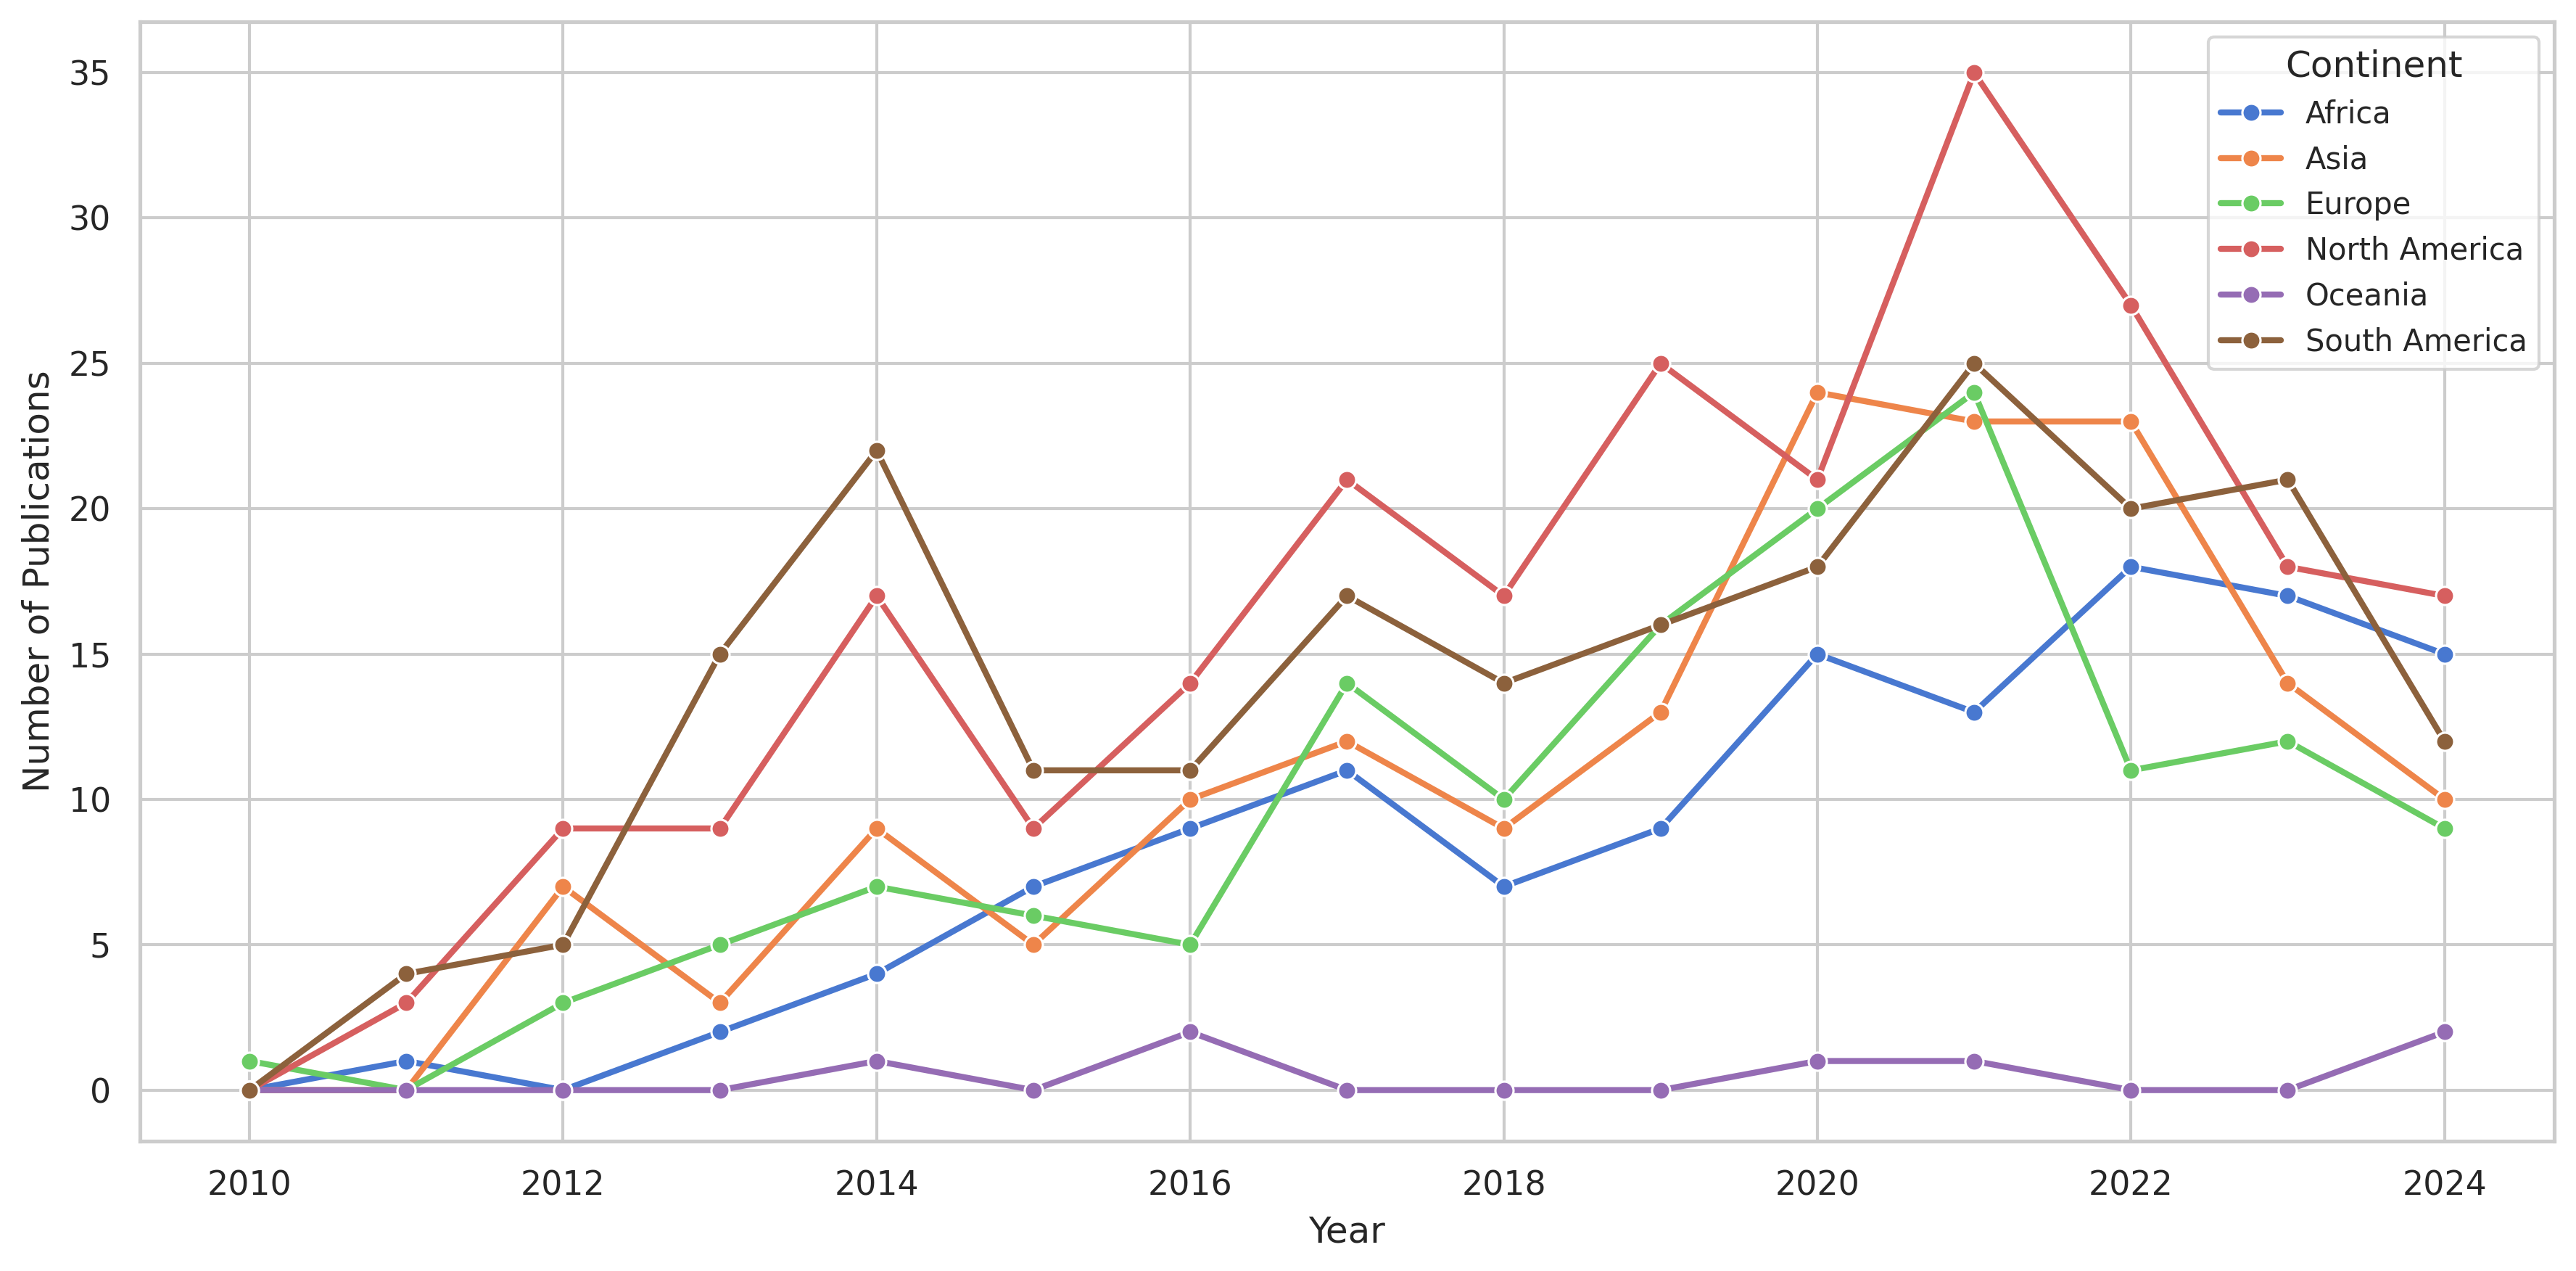

In [ ]:
# Create the Seaborn line plot
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=plot_data,
    x="Year",
    y="Publications",
    hue="Continent",
    marker="o",
    linewidth=2
)

# Customize the plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Publications", fontsize=12)
plt.legend(title="Continent", fontsize=10)
plt.tight_layout()

COUNTRIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/4_updated_subset_with_affiliation.csv")
data

,Journal,Title,Tag1,Tag2,Tag3,Tag4,Tag5,Compound,Authors,Year,Abstract,Paper_type,Affiliations
0,Molecules : A Journal of Synthetic Chemistry a...,Anti-Trypanosomatid Elemanolide Sesquiterpene ...,1A,2AA,NaN,NaN,Plant extract,Sesquiterpene Lactones,"Kimani, Njogu M.; Matasyoh, Josphat C.; Kaiser...",2017,Sleeping sickness or human African trypanosomi...,['Journal Article'],['Institute of Pharmaceutical Biology and Phyt...
1,Viruses,Antiviral and Cytotoxic Activity of Different ...,1B,2BB,NaN,NaN,Plant extract,NaN,"Panda, Sujogya Kumar; Castro, Ana HortÃÂªncia...",2020,Chikungunya and yellow fever virus cause vecto...,['Journal Article'],"['Department of Biology, Katholieke Universite..."
2,Molecules,Antiprotozoal Activity of Plants Used in the M...,1A,2AA,NaN,NaN,Plant extract,"Gallic acid, methyl gallate, 2,3,4,6-tetragall...","Vahekeni, Nina; Brillatz, ThÃÂ©o; Rahmaty, Ma...",2024,"Folk medicine is widely used in Angola, even f...",['Journal Article'],['Department of Medical Parasitology and Infec...
3,Molecules,Search for Antiprotozoal Activity in Herbal Me...,1A,2AA,2AB,NaN,Plant extract,NaN,"Llurba Montesino, NÃÂºria; Kaiser, Marcel; Br...",2015,"Sleeping sickness, Chagas disease, Leishmanias...",['Journal Article'],['Institut fÃÂ¼r Pharmazeutische Biologie und...
4,Plants,Medicinal Plant Preparations Administered by B...,1A,2AC,NaN,NaN,Plant extract,NaN,"Dube, Mthandazo; Raphane, Boingotlo; Sethebe, ...",2022,Schistosomiasis and soil-transmitted helminths...,['Journal Article'],"['Department of Bioorganic Chemistry, Leibniz ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,Scientifica,Photomediated Larvicidal Activity of Pheophorb...,1A,2AC,NaN,NaN,Plant compounds,NaN,"Singh, Divya Jyoti; Singh, Vinay Kumar; Singh,...",2017,Fasciolosis is a parasitic disease caused by F...,['Journal Article'],"['Malacology Laboratory, Department of Zoology..."
561,PLoS Neglected Tropical Diseases,Bacillus thuringiensis-derived Cry5B Has Poten...,1A,2AC,NaN,NaN,Microbial-derived,Bacillus thuringiensis-derived Cry5B,"Urban, Joseph F.; Hu, Yan; Miller, Melanie M.;...",2013,Ascaris suum and Ascaris lumbricoides are two ...,['Journal Article'],"['USDA, Agricultural Research Service, Beltsvi..."
562,The Journal of Venomous Animals and Toxins Inc...,Synergic effects between ocellatin-F1 and bufo...,1B,2B_,NaN,NaN,Animal-derived,"Bufotenine, ocellatin-P1 and ocellatin-F1, are...","Cunha Neto, Rene dos Santos; Vigerelli, Hugo; ...",2015,Background: Rabies is an incurable neglected z...,['Journal Article'],"['Butantan Institute, Laboratory of Biochemist..."
563,Viruses,Silvestrol Inhibits Chikungunya Virus Replicat...,1B,2BB,NaN,NaN,Plant compounds,Silvestrol,"Henss, Lisa; Scholz, Tatjana; GrÃÂ¼nweller, A...",2018,"Silvestrol, a natural compound that is isolate...",['Journal Article'],"['Paul-Ehrlich-Institut, Department of Virolog..."


In [ ]:
# Ensure the necessary columns are present
if "Affiliations" not in data.columns or "Year" not in data.columns:
    print("Error: 'Affiliations' or 'Year' column is missing.")
else:
    # Filter the data for the specified year range
    data = data[(data["Year"] >= 2010) & (data["Year"] <= 2025)]

In [ ]:
# Define a function to extract the country from the first author's affiliation
def extract_country(affiliation):
    if pd.isna(affiliation):  # Handle missing values
        return None
    # Regular expressions for countries
    countries = [
        "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda",
        "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain",
        "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan",
        "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
        "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
        "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros",
        "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic",
        "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica", "Dominican Republic",
        "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
        "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia",
        "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau",
        "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran",
        "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan",
        "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
        "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar",
        "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania",
        "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro",
        "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands",
        "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia",
        "Norway", "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay",
        "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda",
        "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa",
        "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles",
        "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
        "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan",
        "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania",
        "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey",
        "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
        "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela",
        "Vietnam", "Yemen", "Zambia", "Zimbabwe"
    ]
    for country in countries:
        if re.search(rf"\b{country}\b", affiliation, re.IGNORECASE):
            return country
    return "Other"  # For affiliations without a matching country

In [ ]:
# Apply the function to extract countries for the first author's affiliation
data['Country'] = data['Affiliations'].apply(lambda x: extract_country(x.split(';')[0]) if isinstance(x, str) else None)

<ipython-input-6-f0ace3ab949d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country'] = data['Affiliations'].apply(lambda x: extract_country(x.split(';')[0]) if isinstance(x, str) else None)


In [ ]:
data

,Journal,Title,Tag1,Tag2,Tag3,Tag4,Tag5,Compound,Authors,Year,Abstract,Paper_type,Affiliations,Country
0,Molecules : A Journal of Synthetic Chemistry a...,Anti-Trypanosomatid Elemanolide Sesquiterpene ...,1A,2AA,NaN,NaN,Plant extract,Sesquiterpene Lactones,"Kimani, Njogu M.; Matasyoh, Josphat C.; Kaiser...",2017,Sleeping sickness or human African trypanosomi...,['Journal Article'],['Institute of Pharmaceutical Biology and Phyt...,Germany
1,Viruses,Antiviral and Cytotoxic Activity of Different ...,1B,2BB,NaN,NaN,Plant extract,NaN,"Panda, Sujogya Kumar; Castro, Ana HortÃÂÃÂª...",2020,Chikungunya and yellow fever virus cause vecto...,['Journal Article'],"['Department of Biology, Katholieke Universite...",Belgium
2,Molecules,Antiprotozoal Activity of Plants Used in the M...,1A,2AA,NaN,NaN,Plant extract,"Gallic acid, methyl gallate, 2,3,4,6-tetragall...","Vahekeni, Nina; Brillatz, ThÃÂÃÂ©o; Rahmaty...",2024,"Folk medicine is widely used in Angola, even f...",['Journal Article'],['Department of Medical Parasitology and Infec...,Switzerland
3,Molecules,Search for Antiprotozoal Activity in Herbal Me...,1A,2AA,2AB,NaN,Plant extract,NaN,"Llurba Montesino, NÃÂÃÂºria; Kaiser, Marcel...",2015,"Sleeping sickness, Chagas disease, Leishmanias...",['Journal Article'],['Institut fÃÂÃÂ¼r Pharmazeutische Biologie...,Germany
4,Plants,Medicinal Plant Preparations Administered by B...,1A,2AC,NaN,NaN,Plant extract,NaN,"Dube, Mthandazo; Raphane, Boingotlo; Sethebe, ...",2022,Schistosomiasis and soil-transmitted helminths...,['Journal Article'],"['Department of Bioorganic Chemistry, Leibniz ...",Botswana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,Scientifica,Photomediated Larvicidal Activity of Pheophorb...,1A,2AC,NaN,NaN,Plant compounds,NaN,"Singh, Divya Jyoti; Singh, Vinay Kumar; Singh,...",2017,Fasciolosis is a parasitic disease caused by F...,['Journal Article'],"['Malacology Laboratory, Department of Zoology...",India
554,PLoS Neglected Tropical Diseases,Bacillus thuringiensis-derived Cry5B Has Poten...,1A,2AC,NaN,NaN,Microbial-derived,Bacillus thuringiensis-derived Cry5B,"Urban, Joseph F.; Hu, Yan; Miller, Melanie M.;...",2013,Ascaris suum and Ascaris lumbricoides are two ...,['Journal Article'],"['USDA, Agricultural Research Service, Beltsvi...",United States
555,The Journal of Venomous Animals and Toxins Inc...,Synergic effects between ocellatin-F1 and bufo...,1B,2B_,NaN,NaN,Animal-derived,"Bufotenine, ocellatin-P1 and ocellatin-F1, are...","Cunha Neto, Rene dos Santos; Vigerelli, Hugo; ...",2015,Background: Rabies is an incurable neglected z...,['Journal Article'],"['Butantan Institute, Laboratory of Biochemist...",Brazil
556,Viruses,Silvestrol Inhibits Chikungunya Virus Replicat...,1B,2BB,NaN,NaN,Plant compounds,Silvestrol,"Henss, Lisa; Scholz, Tatjana; GrÃÂÃÂ¼nwelle...",2018,"Silvestrol, a natural compound that is isolate...",['Journal Article'],"['Paul-Ehrlich-Institut, Department of Virolog...",Germany


In [ ]:
# Group by year and country to count publications
grouped = data.groupby(["Year", "Country"]).size().reset_index(name="Count")

In [ ]:
 # Identify the top 5 or 6 countries by total contributions
top_countries = (
        grouped.groupby("Country")["Count"].sum().nlargest(6).index.tolist()
    )

In [ ]:
 # Filter for top countries and calculate relative contributions
filtered = grouped[grouped["Country"].isin(top_countries)]
yearly_totals = grouped.groupby("Year")["Count"].sum().reset_index(name="Yearly_Total")
filtered = filtered.merge(yearly_totals, on="Year")
filtered["Relative_Contribution"] = (filtered["Count"] / filtered["Yearly_Total"]) * 100

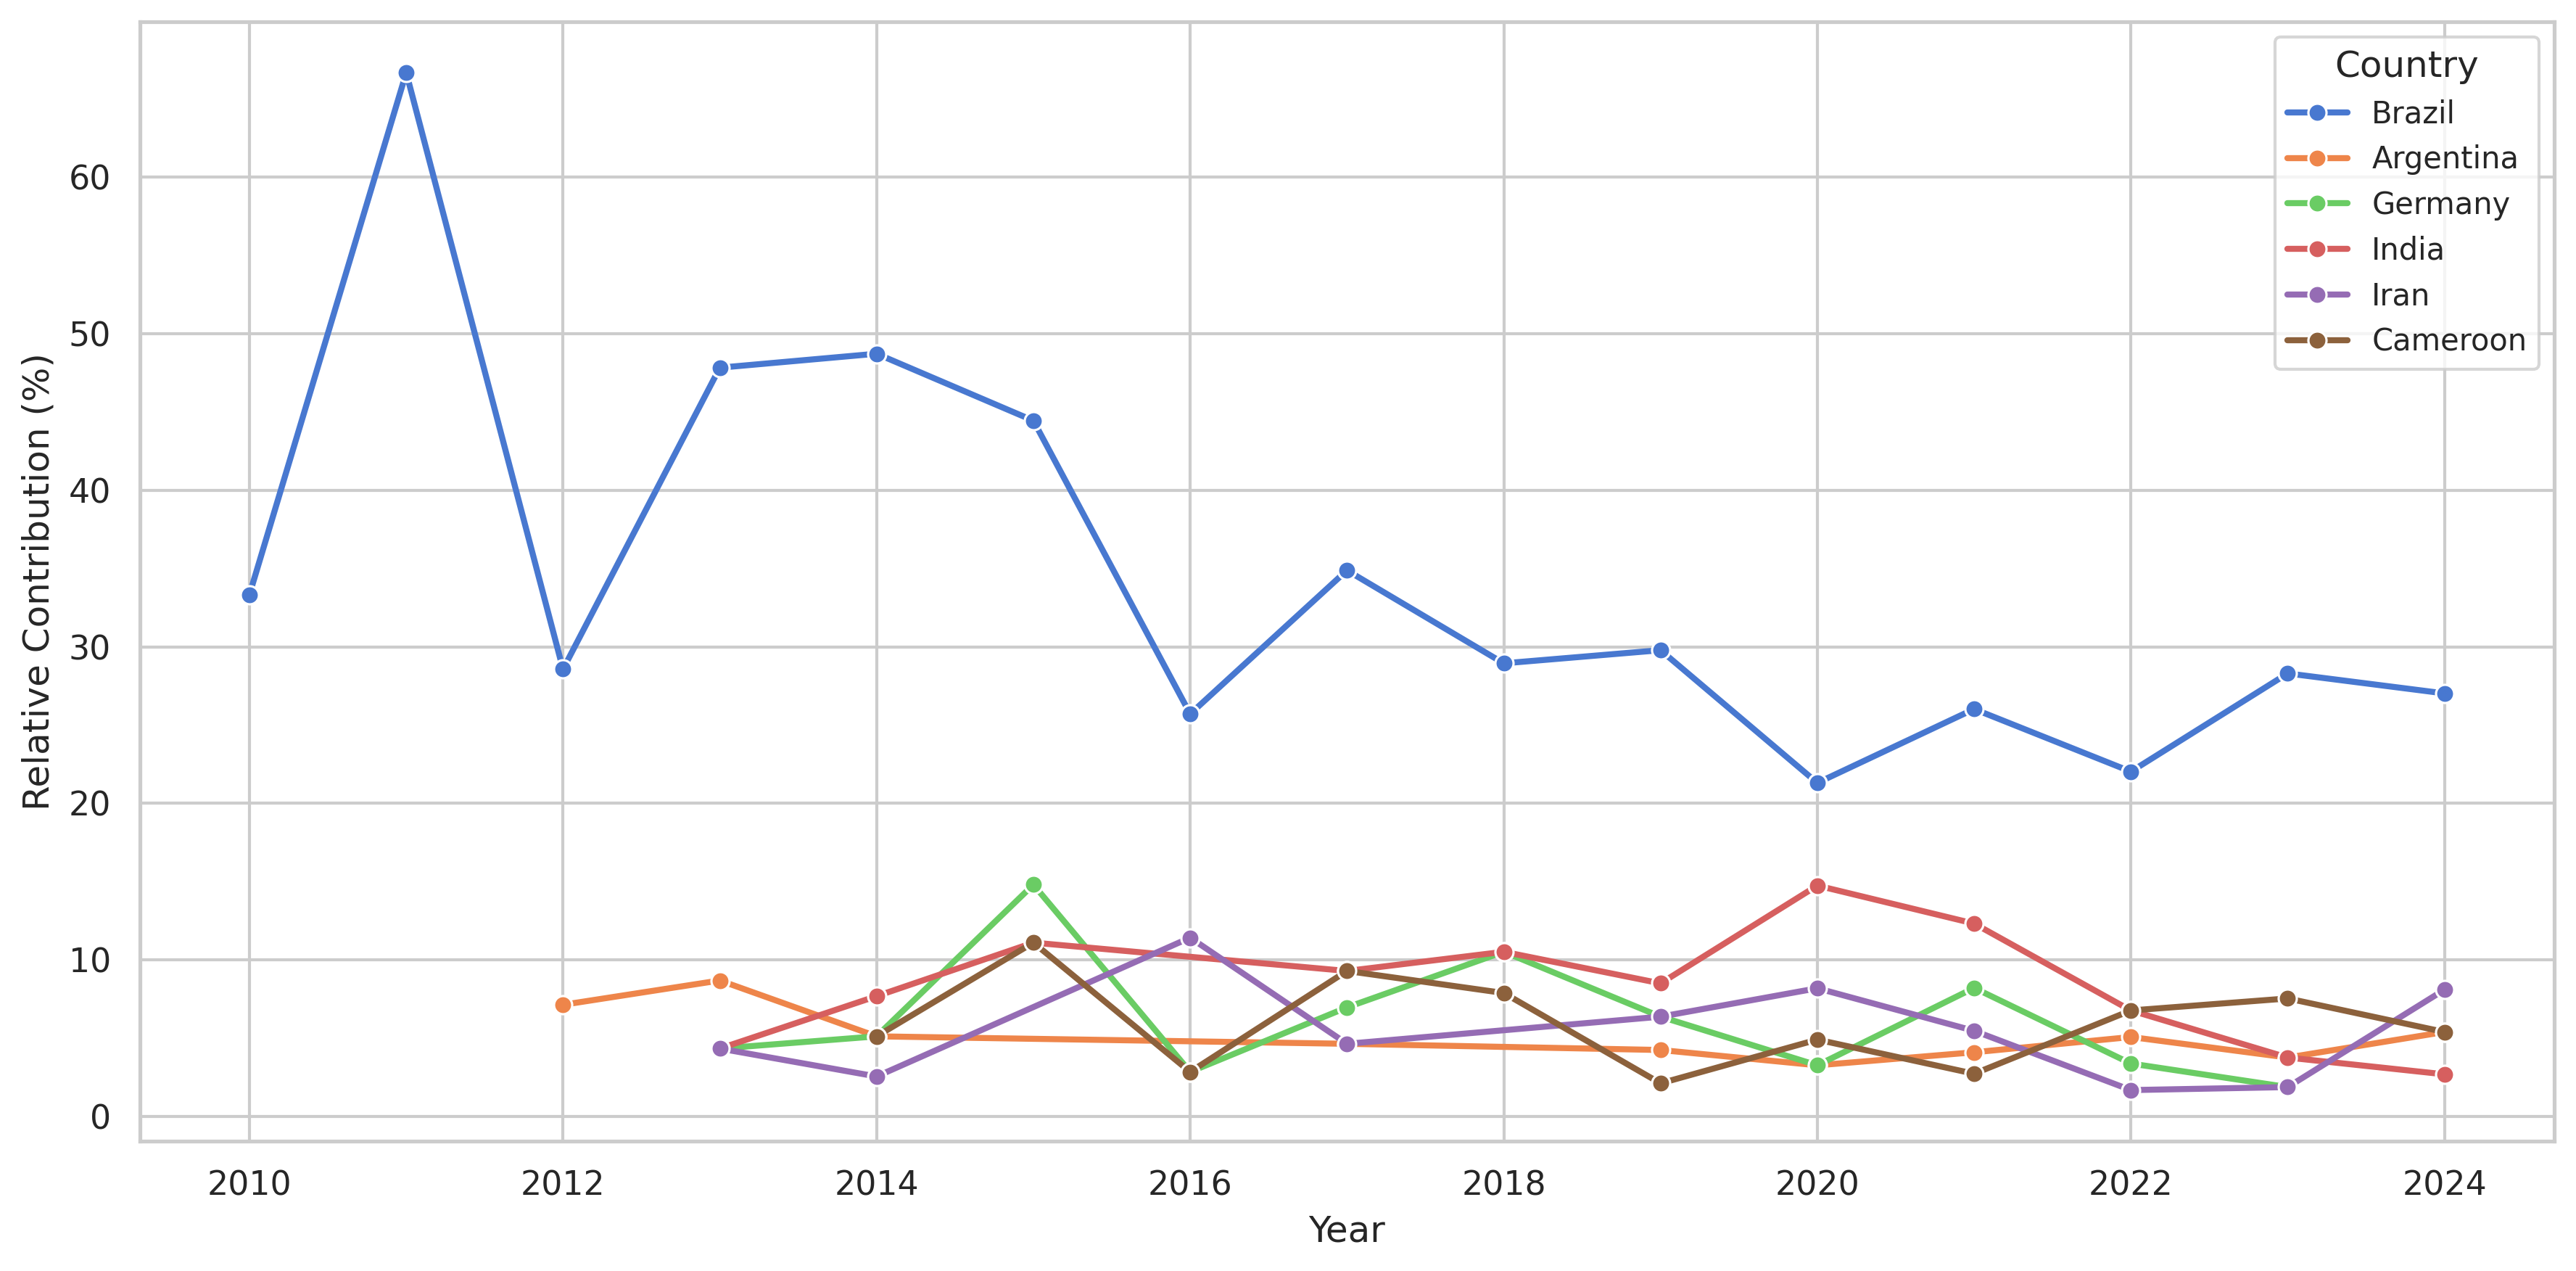

In [ ]:
# Plot the data
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 6))
sns.lineplot(
        data=filtered,
        x="Year",
        y="Relative_Contribution",
        hue="Country",
        marker="o",
        linewidth=2
    )

# Customize the plot
#plt.title("Relative Contributions of Papers by Top Countries (2010–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Relative Contribution (%)", fontsize=12)
plt.legend(title="Country", fontsize=10)
plt.tight_layout()